Exercice 4


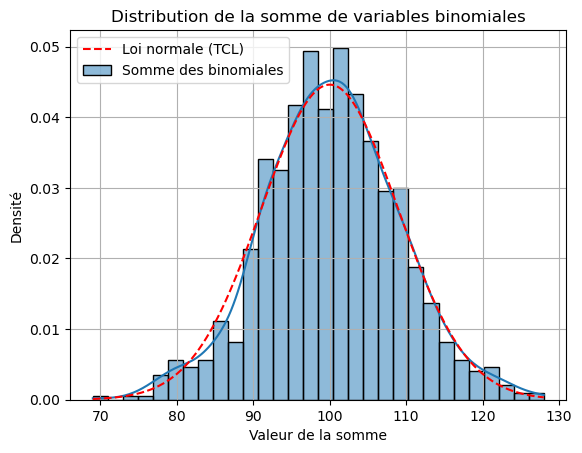

In [ ]:
print("Exercice 4")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Paramètres
n = 1000          # nombre de simulations
nb = 50           # nombre de variables binomiales à sommer
p = 0.2           # probabilité de succès
k = 10            # nombre d'essais dans chaque binomiale

# 1. Simuler n échantillons de somme de nb variables binomiales (chacune de paramètre k, p)
sums = []
for i in range(n):
    binomials = np.random.binomial(k, p, nb)
    sums.append(np.sum(binomials))

# 2. Convertir en array pour analyse
sums = np.array(sums)

# 3. Tracer la distribution de la somme
sns.histplot(sums, kde=True, stat="density", bins=30, label="Somme des binomiales")

# Calculer la distribution normale théorique
mu = nb * k * p
sigma = np.sqrt(nb * k * p * (1 - p))
x = np.linspace(min(sums), max(sums), 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Loi normale (TCL)')

# Affichage
plt.title("Distribution de la somme de variables binomiales")
plt.xlabel("Valeur de la somme")
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.show()


Exercice 6


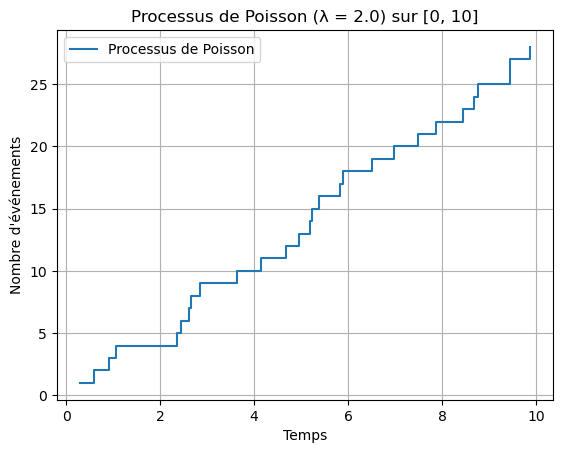

In [9]:
print("Exercice 6")
import numpy as np
import matplotlib.pyplot as plt

# Paramètres du processus
lmbda = 2.0   # taux d'arrivée (événements par unité de temps)
T = 10        # durée totale du processus

# 1 & 2. Simulation d'un processus de Poisson via les intervalles exponentiels
arrival_times = []
time = 0

while time < T:
    # Génère un temps inter-arrivée selon une loi exponentielle
    inter_arrival = np.random.exponential(1 / lmbda)
    time += inter_arrival
    if time < T:
        arrival_times.append(time)

arrival_times = np.array(arrival_times)

# 3. Tracer le nombre d'événements en fonction du temps
event_counts = np.arange(1, len(arrival_times) + 1)

plt.step(arrival_times, event_counts, where='post', label='Processus de Poisson')
plt.xlabel("Temps")
plt.ylabel("Nombre d'événements")
plt.title(f"Processus de Poisson (λ = {lmbda}) sur [0, {T}]")
plt.grid(True)
plt.legend()
plt.show()


Exercice 8
Fréquences observées : {'a': 0.5018, 'b': 0.2988, 'c': 0.1994}
Entropie empirique   : 1.4838 bits
Entropie théorique   : 1.4855 bits


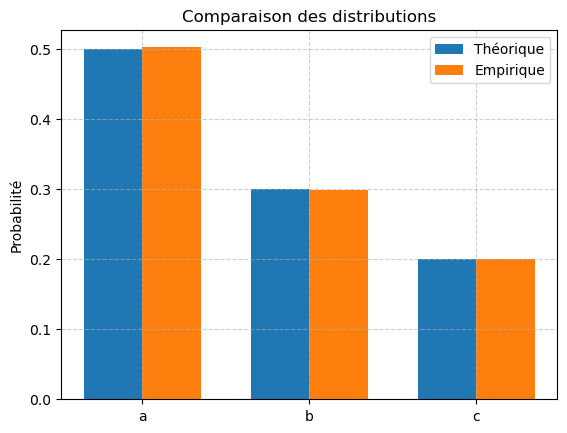

In [7]:
print("Exercice 8")
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from math import log2

# 1. Simuler une source aléatoire avec un alphabet {'a', 'b', 'c'} et des probabilités données
alphabet = ['a', 'b', 'c']
probs = [0.5, 0.3, 0.2]  # P(a)=0.5, P(b)=0.3, P(c)=0.2
n_samples = 10000

samples = np.random.choice(alphabet, size=n_samples, p=probs)

# 2. Calculer les fréquences observées et l'entropie empirique
counts = Counter(samples)
empirical_probs = [count / n_samples for count in [counts[s] for s in alphabet]]

H_empirical = -sum(p * log2(p) for p in empirical_probs if p > 0)

# 3. Entropie théorique
H_theoretical = -sum(p * log2(p) for p in probs)

# Résultat
print("Fréquences observées :", dict(zip(alphabet, empirical_probs)))
print(f"Entropie empirique   : {H_empirical:.4f} bits")
print(f"Entropie théorique   : {H_theoretical:.4f} bits")

# (Optionnel) Tracer les fréquences observées vs théoriques
x = np.arange(len(alphabet))
width = 0.35

plt.bar(x - width/2, probs, width, label='Théorique')
plt.bar(x + width/2, empirical_probs, width, label='Empirique')
plt.xticks(x, alphabet)
plt.ylabel("Probabilité")
plt.title("Comparaison des distributions")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [17]:
print("Exercice 2")
import random 
def approche_pi(n):
    b = 0
    for i in range(n):
        x = random.random()
        y = random.random()
        if x**2 + y**2 <= 1:
            b += 1
    return 4 * b / n

Exercice 2


In [2]:
print("Exercice 2")
import numpy as np
import matplotlib.pyplot as plt

# Fonction d'estimation de pi
def approche_pi(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    b = (x**2 + y**2) <= 1
    pi_estimate = 4 * np.sum(b) / n
    return pi_estimate

# Répéter l'estimation pour différentes valeurs de n
n_values = np.logspace(1, 6, num=100, dtype=int)
pi_real = np.pi
errors = []

for n in n_values:
    pi_est = estimate_pi(n)
    error = abs(pi_est - pi_real)
    errors.append(error)

# Tracer l'erreur
plt.figure(figsize=(10, 6))
plt.plot(n_values, errors, label="Erreur absolue", color='red')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Nombre de points (log scale)")
plt.ylabel("Erreur absolue (log scale)")
plt.title("Erreur de l'estimation de π par méthode de Monte Carlo")
plt.grid(True)
plt.legend()
plt.show()


Exercice 2


NameError: name 'estimate_pi' is not defined

In [49]:
print("Exercice 8")
from scipy.integrate import quad

# 1. Implémentation de la suite
u = [1.0]  # u₀ = 1

for n in range(25):  # Calculer u₁ à u₁₀
    # Définir la fonction à intégrer : uₙ * xⁿ
    integrand = lambda x: u[-1] * x**n
    un_plus_1, _ = quad(integrand, 0, 1)
    u.append(un_plus_1)

# 2. Affichage des 10 premiers termes
for i, val in enumerate(u):
    print(f"u_{i} = {val:.8f}")

# 3. Analyse
print(f"\nDernier rapport u_n / u_(n+1) ≈ {u[-2] / u[-1]:.4f}")


Exercice 8
u_0 = 1.00000000
u_1 = 1.00000000
u_2 = 0.50000000
u_3 = 0.16666667
u_4 = 0.04166667
u_5 = 0.00833333
u_6 = 0.00138889
u_7 = 0.00019841
u_8 = 0.00002480
u_9 = 0.00000276
u_10 = 0.00000028
u_11 = 0.00000003
u_12 = 0.00000000
u_13 = 0.00000000
u_14 = 0.00000000
u_15 = 0.00000000
u_16 = 0.00000000
u_17 = 0.00000000
u_18 = 0.00000000
u_19 = 0.00000000
u_20 = 0.00000000
u_21 = 0.00000000
u_22 = 0.00000000
u_23 = 0.00000000
u_24 = 0.00000000
u_25 = 0.00000000

Dernier rapport u_n / u_(n+1) ≈ 25.0000


Exercice 10


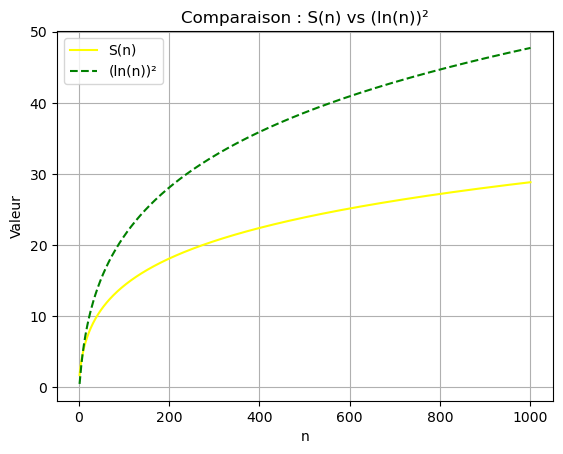

La somme double imbriquée est S = 5.0643113819601915


In [65]:
print("Exercice 10")
import numpy as np
def som_double(n):
    S = 0.0
    H = 0.0  # somme partielle des harmoniques
    for i in range(1, n + 1):
        H += 1 / i           # H_i = H_{i-1} + 1/i
        S += (1 / i) * H     # S += H_i / i
    return S

import math

n_values = np.arange(2, 1001)
s_values = [som_double(n) for n in n_values]
ln_squared = [math.log(n)**2 for n in n_values]

# Tracer la courbe
plt.plot(n_values, s_values, label="S(n)", color='yellow')
plt.plot(n_values, ln_squared, label="(ln(n))²", color='green', linestyle='--')
plt.xlabel("n")
plt.ylabel("Valeur")
plt.title("Comparaison : S(n) vs (ln(n))²")
plt.legend()
plt.grid(True)
plt.show()



print("La somme double imbriquée est S =" ,som_double(10))

oprime(122)) return u return u)
return u


Exercice 14
p = 0.5 → Moyenne : 9.70, Variance : 9556.71
p = 0.6 → Moyenne : 1998.12, Variance : 9744.78
p = 0.7 → Moyenne : 4010.45, Variance : 7906.92


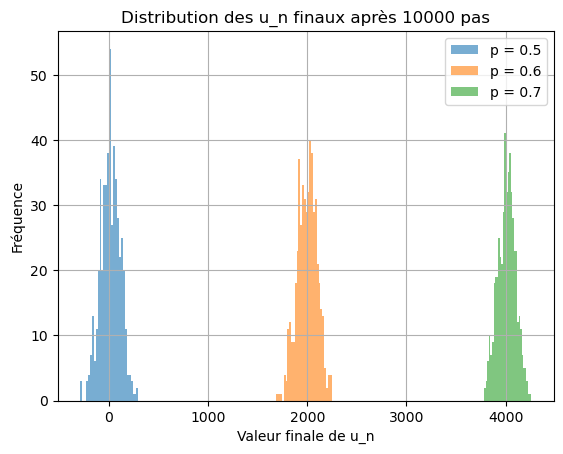

In [82]:
print("Exercice 14")
import numpy as np
import matplotlib.pyplot as plt
def simulate_marche(p, n_steps, n_experiences):
    final_values = []
    for _ in range(n_experiences):
        steps = np.random.choice([-1, 1], size=n_steps, p=[1-p, p])
        u = np.cumsum(np.insert(steps, 0, 0))  # u_0 = 0
        final_values.append(u[-1])
    mean = np.mean(final_values)
    var = np.var(final_values)
    return mean, var, final_values
# Paramètres
n_steps = 10000
n_experiences = 500
p_values = [0.5, 0.6, 0.7]
for p in p_values:
    mean, var, values = simulate_marche(p, n_steps, n_experiences)
    print(f"p = {p} → Moyenne : {mean:.2f}, Variance : {var:.2f}")
    # Affichage d'un histogramme des valeurs finales
    plt.hist(values, bins=30, alpha=0.6, label=f"p = {p}")
plt.title(f"Distribution des u_n finaux après {n_steps} pas")
plt.xlabel("Valeur finale de u_n")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

In [80]:
print("Exercice 12")
from math import gcd

def suite_coprime(n):
    u = [1]  # u₀ = 1
    for i in range(n - 1):
        k = u[-1] + 1
        while gcd(k, u[-1]) != 1:
            k += 1
        u.append(k)
    return u


print(suite_coprime(122))

Exercice 12
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122]
